In [94]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

Load and preprocess dataset

In [96]:
def load_mnist(binary_classification=True):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
    train = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    if binary_classification:
        train = [(x, float(y == 0)) for x, y in train]
        test = [(x, float(y == 0)) for x, y in test]

    train_loader = DataLoader(train, batch_size=64, shuffle=True)
    test_loader = DataLoader(test, batch_size=64, shuffle=False)
    return train_loader, test_loader


Logistic Regression Model

In [98]:
class LogisticRegressionModel:
    def __init__(self, input_dim):
        self.w = np.zeros((input_dim, 1))
        self.b = 0

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        return self.sigmoid(X @ self.w + self.b)

    def loss(self, X, y):
        m = len(y)
        preds = self.predict(X)
        loss = -np.mean(y * np.log(preds + 1e-8) + (1 - y) * np.log(1 - preds + 1e-8))
        return loss

    def gradient(self, X, y):
        m = len(y)
        preds = self.predict(X)
        error = preds - y
        dw = (X.T @ error) / m
        db = np.mean(error)
        return dw, db

 SGD Optimizer (Student: extend this)

In [100]:
def sgd_scratch(model, train_loader, lr=0.01, num_epochs=10):
    loss_history = []

    for epoch in range(num_epochs):
        for batch in train_loader:
            x_batch, y_batch = batch
            X = x_batch.numpy()
            y = y_batch.numpy().reshape(-1, 1)

            prediction = model.sigmoid(X @ model.w + model.b)

            bce_loss = -np.mean(y * np.log(prediction + 1e-8) + (1 - y) * np.log(1 - prediction + 1e-8))

            #Gradients
            samples = len(y)
            error = prediction - y

            #weights and biases
            dweight = (X.T @ error) / samples
            dbias = np.mean(error)
            model.w -= lr * dweight
            model.b -= lr * dbias

            loss_history.append(bce_loss)

    return loss_history

Plotting and Evaluation

In [102]:
def plot_loss(losses, label='SGD'):
    plt.plot(losses, label=label)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Loss vs Iteration")
    plt.legend()

Decreasing Learning Rate

In [104]:
def decLearnRate(model, train_loader):
    # at = a0 / (a + Lt) a0 = 0.1, L=0.001
    loss_history =[]
    
    learning_rate = 0.1 #a0
    epochs = 5
    lam = 0.001 #L 

    for epoch in range(epochs):
        for t, batch in enumerate(train_loader):
            x_batch, y_batch = batch
            X = x_batch.numpy()
            y = y_batch.numpy().reshape(-1, 1)
            new_learning_rate = learning_rate / (1 + lam * t)
            
            prediction = model.sigmoid(X @ model.w + model.b)

            bce_loss = -np.mean(y * np.log(prediction + 1e-8) + (1 - y) * np.log(1 - prediction + 1e-8))

            #Gradients
            samples = len(y)
            error = prediction - y

            #weights and biases
            dweight = (X.T @ error) / samples 
            dbias = np.mean(error)
            model.w -= new_learning_rate * dweight
            model.b -= new_learning_rate * dbias

            loss_history.append(bce_loss)

    return loss_history
    

 Main Function

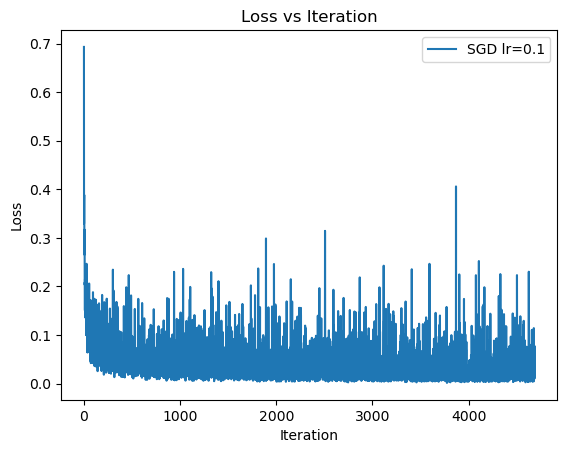

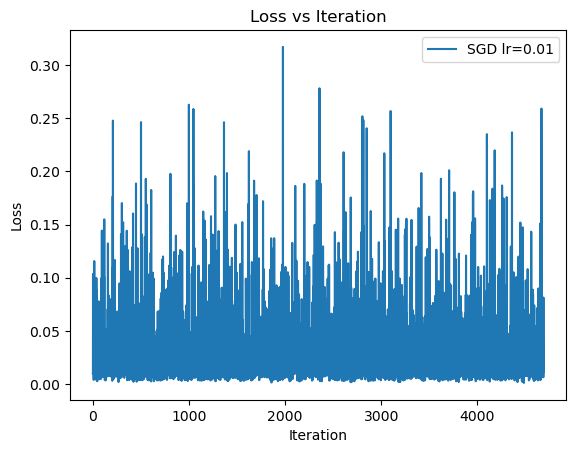

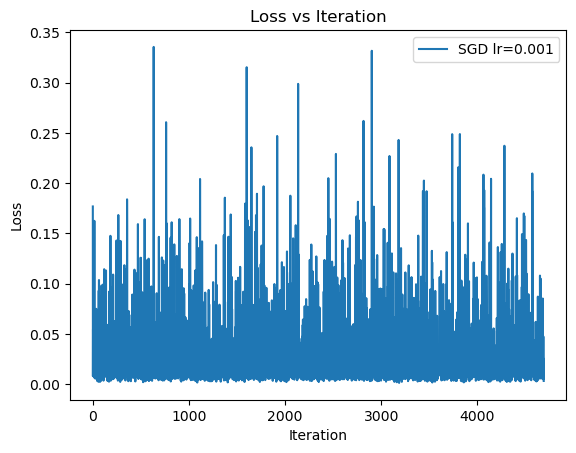

done with different learning rates


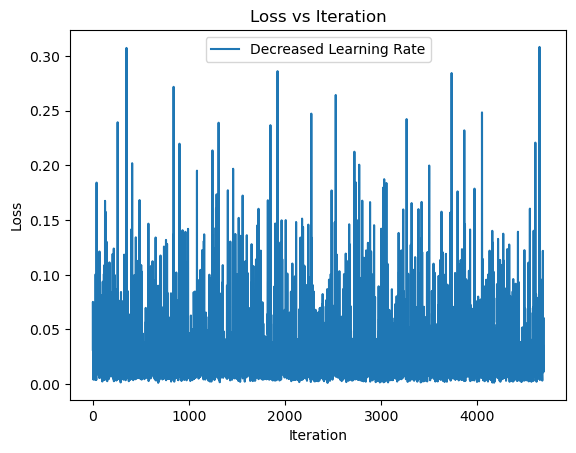

Done with decreased learning rate


In [106]:
if __name__ == '__main__':
    train_loader, test_loader = load_mnist()
    input_dim = 28 * 28
    model = LogisticRegressionModel(input_dim=input_dim)

    # SGD example
    learningRates = [0.1, 0.01, 0.001]
    for rate in learningRates:
        loss_sgd = sgd_scratch(model, train_loader, lr=rate, num_epochs=5)
        plot_loss(loss_sgd, label=f'SGD lr={rate}')
        plt.show()
    print('done with different learning rates')

    dlr_outcome = decLearnRate(model, train_loader)
    plot_loss(dlr_outcome, label = 'Decreased Learning Rate')
    plt.show()
    print('Done with decreased learning rate')
